# Введение

Данный ноутбук содержит пример обучения линейной регрессионной модели с помошью градиентного спуска. Используются базовые билиотеки языка python (версия 3.5), которые могут быть полезны при реализации заданий курса.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
train_file = "c:/work/SUAI/StartML/task1_train.csv"
data_train = pd.read_csv(train_file).as_matrix()

data_train

array([[  0.00000000e+00,   7.37134136e-03],
       [  1.00000000e-02,   1.84397484e-03],
       [  2.00000000e-02,   3.02327283e-02],
       ..., 
       [  6.25000000e+00,   5.97449586e-01],
       [  6.26000000e+00,   6.11399727e-01],
       [  6.27000000e+00,   6.03283081e-01]])

In [40]:
train_file = "c:/work/SUAI/StartML/task1_train.csv"
data_train = pd.read_csv(train_file).as_matrix()

x_train = data_train[:, 0]
y_train = data_train[:, 1]

num_samples = len(x_train)

x_train = np.vstack([np.ones(num_samples), x_train, x_train**2, x_train**3, x_train**4])
x_train = np.transpose(x_train)

num_features = x_train.shape[1]

y_train.shape = (len(y_train), 1)

print(x_train.shape)
print(y_train.shape)
# x_train
# print(len(y_train))
# plt.plot(x_train[:, 1], y_train)

x_train

(628, 5)
(628, 1)


array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.00000000e-02,   1.00000000e-04,
          1.00000000e-06,   1.00000000e-08],
       [  1.00000000e+00,   2.00000000e-02,   4.00000000e-04,
          8.00000000e-06,   1.60000000e-07],
       ..., 
       [  1.00000000e+00,   6.25000000e+00,   3.90625000e+01,
          2.44140625e+02,   1.52587891e+03],
       [  1.00000000e+00,   6.26000000e+00,   3.91876000e+01,
          2.45314376e+02,   1.53566799e+03],
       [  1.00000000e+00,   6.27000000e+00,   3.93129000e+01,
          2.46491883e+02,   1.54550411e+03]])

In [10]:
def loss(y_gt, y_pred):
    return np.sum(((y_gt - y_pred)**2))/(len(y_gt) * 2.0)

def predict(theta, x):
    return np.dot(x, theta)

def derivative(theta, x, y_gt, y_pred):
    return np.dot(x.transpose(), y_pred - y_gt) / len(y_gt)

def derivative_check(theta, x, y_gt):
    d_theta = np.zeros([len(theta), 1])
    epsilon = 1e-6
    for i in range(0,len(theta)):
        theta_tmp = theta;
        theta_tmp[i] = theta_tmp[i] + epsilon
        d_theta[i] = loss(y_gt, predict(theta_tmp, x)) - loss(y_gt, predict(theta, x))
    return d_theta

In [41]:
np.random.seed(0)
theta = np.random.randn(num_features, 1)
# theta[0] = 0
alpha = 0.0000001
num_epochs = 1000000

y_pred = predict(theta, x_train)
loss_val = loss(y_train, y_pred)
print("Initial loss :", loss_val)

Initial loss : 709991.690802


Loss : 16.0127345259
Loss : 0.812440638707
Loss : 0.178765691848
Loss : 0.150747743415
Loss : 0.14794896867
Loss : 0.146236294133
Loss : 0.144605432835
Loss : 0.143013716975
Loss : 0.141458481707


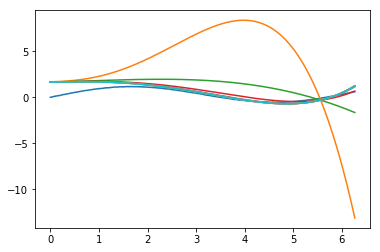

In [42]:
plt.plot(x_train[:, 1], y_train)
# plt.plot(x_train[:, 1], predict(theta, x_train))
for i in range(0, num_epochs):
    d_theta = derivative(theta, x_train, y_train, y_pred)
    theta = theta - alpha*d_theta
    y_pred = predict(theta, x_train)
    if i > 0 and np.mod(i, num_epochs / 10) == 0:
        loss_val = loss(y_train, y_pred)
        print("Loss :", loss_val)
        plt.plot(x_train[:, 1], y_pred)

Minimal loss :  0.0978255982812


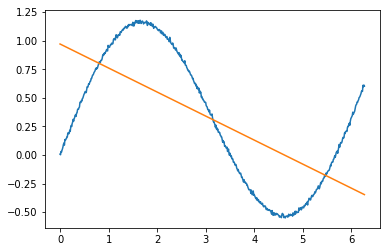

In [31]:
# theoretical curve
best_loss = np.inf
for theta1 in np.linspace(-10, 10, 1000):
    for theta2 in np.linspace(-10, 10, 1000):
        theta_fs = np.array([[theta1], [theta2]])
        loss_val_fs = loss(y_train, predict(theta_fs, x_train))
        if loss_val_fs < best_loss:
            best_loss = loss_val_fs
            best_theta = theta_fs

print("Minimal loss : ", best_loss)
y_pred_best = predict(best_theta, x_train)
plt.plot(x_train[:, 1], y_train)
plt.plot(x_train[:, 1], y_pred_best)